In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from mpl_toolkits import mplot3d
from scipy import stats
import statsmodels.api as sm
from scipy.optimize import curve_fit

In [2]:
# Import SIE data
directory = Path('Sea Ice')

files = [file_name for file_name in os.listdir(directory) if file_name.endswith('.csv')]

SIE_N = pd.DataFrame(columns=['year','mo','extent'])
SIE_S = pd.DataFrame(columns=['year','mo','extent'])

# Import SIE for North and South
for indx,file in enumerate(files):
    path_to_file = os.path.join(directory, file)
    data_file = pd.read_csv(path_to_file) 
    data_file.columns = data_file.columns.str.strip()
    if (data_file['region'].str.strip() == 'N').all() == True:
        SIE_N = pd.concat([SIE_N, data_file[['year','mo','extent']]])
    elif (data_file['region'].str.strip() == 'S').all() == True:
        SIE_S = pd.concat([SIE_S, data_file[['year','mo', 'extent']]]) 
        

# Put in chronological order
SIE_N = SIE_N.sort_values(['year','mo']).iloc[2:]
SIE_S = SIE_S.sort_values(['year','mo']).iloc[2:]


# Substitute -9999 values for NaN
SIE_N['extent'] = SIE_N['extent'].mask(SIE_N['extent'] < SIE_N['extent'].quantile(0.01))

(4.0, 17.0)

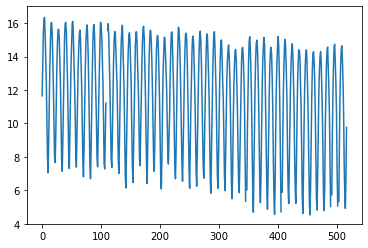

In [3]:
# Plot SIE_N
plt.plot(np.array(SIE_N['extent']))
plt.ylim([4,17])

In [ ]:
import numpy.linalg as la
SIE_S['extent'] = SIE_S['extent'].mask(SIE_S['extent'] < SIE_S['extent'].quantile(0.01))

In [4]:
# Import Temperature Data
directory = Path('Temperature')

files = [file_name for file_name in os.listdir(directory) if file_name.endswith('.csv')]
file = files[0]
path_to_file = os.path.join(directory, file)
data_file = pd.read_csv(path_to_file) 
data_file.columns = data_file.columns.str.strip()
T = data_file.iloc[1979-1880:, 1:13]

# Put values in chronological order in a flat list
T_all = T.values.tolist()
T_flat = [item for sublist in T_all for item in sublist]
T_flat = T_flat[0:-1]
T_flat = [float(i) for i in T_flat]

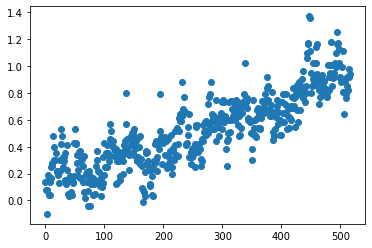

In [5]:
# Plot Temperature
t = np.linspace(0,len(T_flat)-1,len(T_flat))
plt.scatter(t,T_flat)

r: -0.0950683883107054


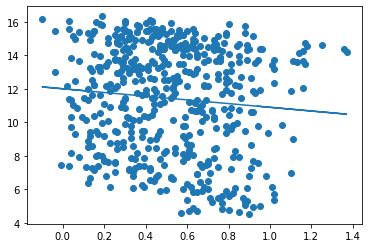

In [30]:
# Doing all the data points yields very bad r
SIEN_extent = np.array(SIE_N['extent'])
T_flat0 = np.array(T_flat)
valid = ~(np.isnan(T_flat0) | np.isnan(SIEN_extent))
m, b, r, p, std_err = stats.linregress(T_flat0[valid], SIEN_extent[valid])
print('r:', r)
plt.scatter(T_flat0, SIEN_extent)
plt.plot(T_flat0, m*T_flat0+b)

r: 0.17739636015434437
SEr: 4.887083076252532
r-SEr -4.7096867160981875
r+SEr 5.064479436406876


Text(0.5, 0, 'Temperature')

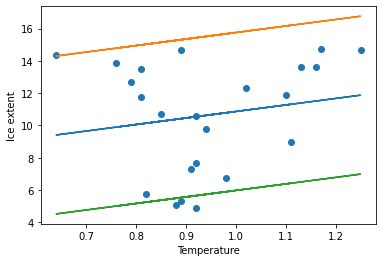

In [31]:
# Doing single year windows yields higher values of 'r' but not statistical significance
# This makes sense, as we are looking at the relation between anomalies across one year and the 
# respective sea ice variation across the months. However, anomalies will be similar throughout 
# a year, so we just expect multiple dots of different y values over a very small range of x values.

SIEN_extent = np.array(SIE_N['extent'])[-24:]
T_flat0 = np.array(T_flat)[-24:]
valid = ~(np.isnan(T_flat0) | np.isnan(SIEN_extent))
m, b, r, p, std_err = stats.linregress(T_flat0[valid], SIEN_extent[valid])
print('r:', r)
print('SEr:', std_err)
print('r-SEr',r-std_err)
print('r+SEr',r+std_err)
plt.scatter(T_flat0, SIEN_extent)
plt.plot(T_flat0, m*T_flat0+b)
plt.plot(T_flat0, m*T_flat0+b+std_err)
plt.plot(T_flat0, m*T_flat0+b-std_err)
plt.ylabel('Ice extent')
plt.xlabel('Temperature')

r: 0.8644310608625985
SEr: 4.589048881067267
r: 0.15016472414702356
SEr: 13.204355118904495
r: 0.10233786771430052
SEr: 15.613500807544192
r: 0.6686514680334987
SEr: 6.032775110941931
r: 0.7182275968695521
SEr: 4.111394958360843
r: -0.10072959083958923
SEr: 9.415438736984523
r: -0.2740041747576458
SEr: 9.673744149337121
r: -0.4362313649974581
SEr: 11.097221937836867


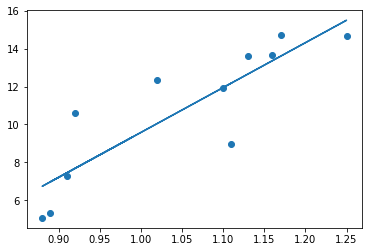

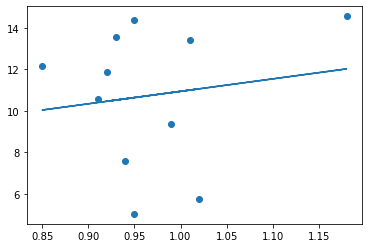

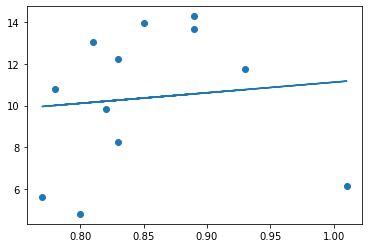

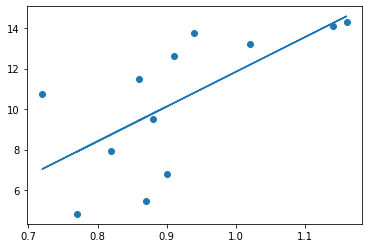

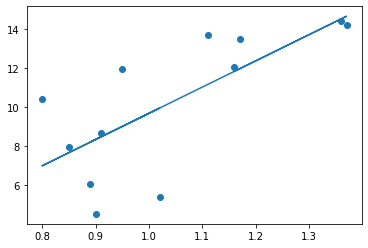

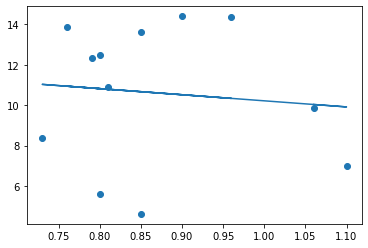

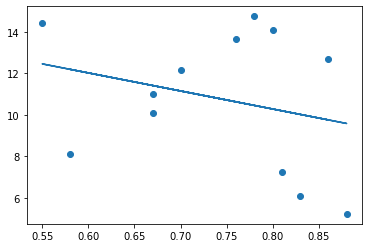

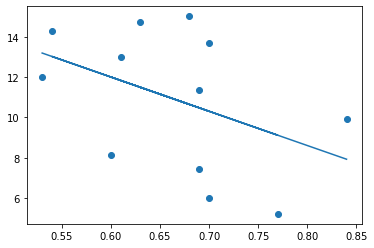

In [32]:
# Doing single year windows over the past 9 years
# Confirms hypothesis above
L=10
for l in range(2, L):
    SIEN_extent = np.array(SIE_N['extent'])[-l*12:-(l-1)*12]
    T_flat0 = np.array(T_flat)[-l*12:-(l-1)*12]
    valid = ~(np.isnan(T_flat0) | np.isnan(SIEN_extent))
    m, b, r, p, std_err = stats.linregress(T_flat0[valid], SIEN_extent[valid])
    print('r:', r)
    print('SEr:', std_err)
    plt.figure()
    plt.scatter(T_flat0, SIEN_extent)
    plt.plot(T_flat0, m*T_flat0+b)

r: -0.8207605879660878
SEr: 0.18702402278290373
r-SEr -1.0077846107489914
r+SEr -0.633736565183184


Text(0.5, 0, 'Temperature')

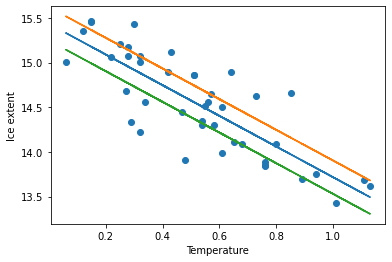

In [27]:
# Doing same month throught the years leads to statistical significance
SIEN_extent = np.array(SIE_N['extent'])[5::12]
T_flat0 = np.array(T_flat)[5::12]
valid = ~(np.isnan(T_flat0) | np.isnan(SIEN_extent))
m, b, r, p, std_err = stats.linregress(T_flat0[valid], SIEN_extent[valid])
print('r:', r)
print('SEr:', std_err)
print('r-SEr',r-std_err)
print('r+SEr',r+std_err)
plt.scatter(T_flat0, SIEN_extent)
plt.plot(T_flat0, m*T_flat0+b)
plt.plot(T_flat0, m*T_flat0+b+std_err)
plt.plot(T_flat0, m*T_flat0+b-std_err)
plt.ylabel('Ice extent')
plt.xlabel('Temperature')

r: -0.7531819168364879
SEr: 0.22094200368599023
r: -0.658914371243556
SEr: 0.231094453515342
r: -0.7647157959752541
SEr: 0.1867874687764928
r: -0.8207605879660878
SEr: 0.18702402278290373
r: -0.7701256213770242
SEr: 0.2042971655823122
r: -0.8725074942575063
SEr: 0.19682346165605952
r: -0.8713041375652564
SEr: 0.2931264934080909
r: -0.8370676034399455
SEr: 0.3435450245328443
r: -0.842206400131262
SEr: 0.3439928076428436
r: -0.8733250248624405
SEr: 0.2982139272239105


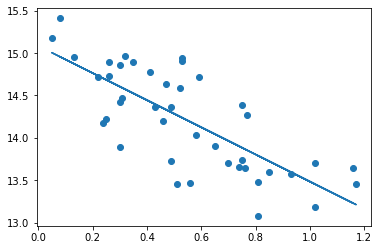

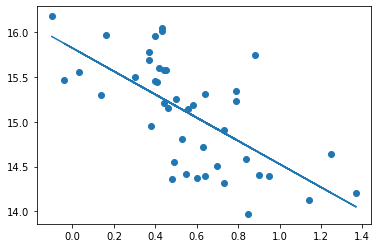

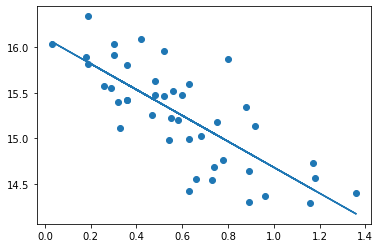

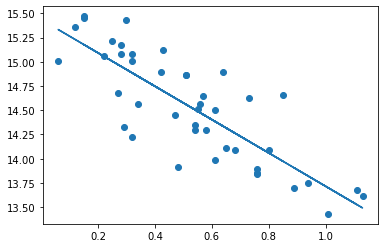

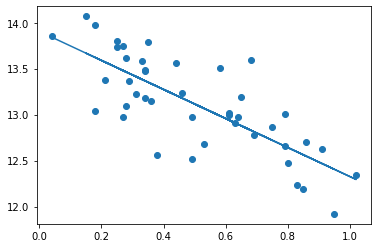

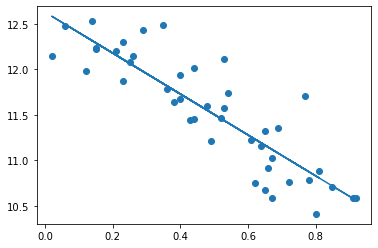

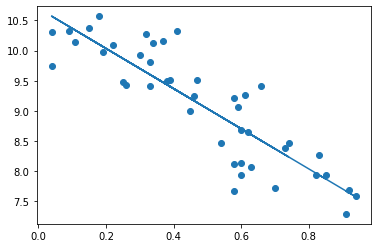

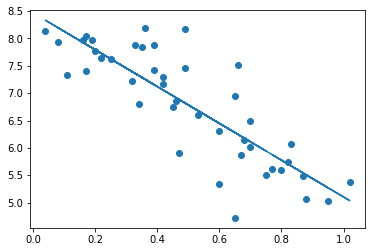

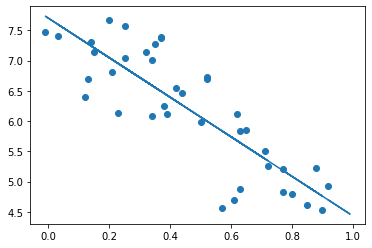

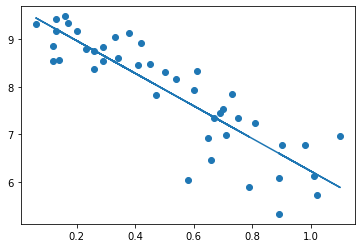

In [57]:
# Doing same month throught the years for every month 
L=12
for l in range(2, L):
    SIEN_extent = np.array(SIE_N['extent'])[l::12]
    T_flat0 = np.array(T_flat)[l::12]
    valid = ~(np.isnan(T_flat0) | np.isnan(SIEN_extent))
    m, b, r, p, std_err = stats.linregress(T_flat0[valid], SIEN_extent[valid])
    print('r:', r)
    print('SEr:', std_err)
    plt.figure()
    plt.scatter(T_flat0, SIEN_extent)
    plt.plot(T_flat0, m*T_flat0+b)

43.083333333333336
r: -0.9237706329627473
SEr: 0.17793063365069706


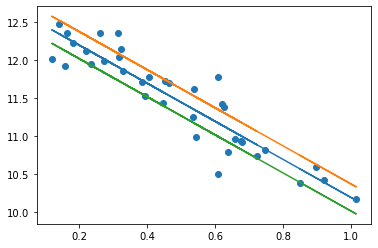

In [75]:
# Looking at mean anomaly per year
# Number of years
print(len(T_flat)/12)

L=42

T_Mean=[]
SIEN_extent_Mean=[]
for l in range(0, L):
    SIEN_extent = np.array(SIE_N['extent'])[2+l*12:2+(l+1)*12]
    SIEN_extent_mean = np.mean(SIEN_extent)
    T_flat0 = np.array(T_flat)[2+l*12:2+(l+1)*12]
    T_mean = np.mean(T_flat0)
    valid = ~(np.isnan(T_mean) | np.isnan(SIEN_extent_mean))
    T_Mean.extend(T_mean[valid])
    SIEN_extent_Mean.extend(SIEN_extent_mean[valid])

m, b, r, p, std_err = stats.linregress(T_Mean, SIEN_extent_Mean)
print('r:', r)
print('SEr:', std_err)
plt.scatter(T_Mean, SIEN_extent_Mean)
plt.plot(T_Mean, m*np.array(T_Mean)+b)
plt.plot(T_Mean, m*np.array(T_Mean)+b+std_err)
plt.plot(T_Mean, m*np.array(T_Mean)+b-std_err)

In [ ]:
# Import AO Data
directory = Path('AO')
path_to_file = os.path.join(directory, 'AO_data.txt')
data_file = pd.read_csv(path_to_file, sep="\s+") 
data_file.columns = data_file.columns.str.strip()
AO = data_file.iloc[29:, :]

AO_all = AO.values.tolist()
AO_flat = [item for sublist in AO_all for item in sublist]
AO_flat = AO_flat[0:-1]


In [ ]:
# Doing same month throught the years
SIEN_extent = np.array(SIE_N['extent'])[5::12]
AO_flat0 = np.array(AO_flat)[5::12]
valid = ~(np.isnan(AO_flat0) | np.isnan(SIEN_extent))
m, b, r, p, std_err = stats.linregress(AO_flat0[valid], SIEN_extent[valid])
print('r:', r)
print('SEr:', std_err)
plt.scatter(AO_flat0, SIEN_extent)
plt.plot(AO_flat0, m*AO_flat0+b)
plt.plot(AO_flat0, m*AO_flat0+b+r)
plt.plot(AO_flat0, m*AO_flat0+b-r)
plt.ylabel('Ice extent')
plt.xlabel('AO')

In [ ]:
# Doing all the data points yields very bad r
SIEN_extent = np.array(SIE_N['extent'])
AO_flat0 = np.array(AO_flat)
valid = ~(np.isnan(AO_flat0) | np.isnan(SIEN_extent))
m, b, r, p, std_err = stats.linregress(AO_flat0[valid], SIEN_extent[valid])
print('r:', r)
print(len(AO_flat0), len(SIEN_extent))
plt.scatter(AO_flat0, SIEN_extent)
plt.plot(AO_flat0, m*AO_flat0+b)

In [ ]:
# Import AAO Data
directory = Path('AAO')
file = 'AAO_data.txt'
path_to_file = os.path.join(directory, file)
data_file = pd.read_csv(path_to_file, sep='\s+')
data_file.columns = data_file.columns.str.strip()

# Put values in chronological order in a flat list
AAO = data_file.values.tolist()
AAO_flat = [item for sublist in AAO for item in sublist]
AAO_flat = AAO_flat[:-1]

In [ ]:
# Plot AAO
t = np.linspace(0,len(AAO_flat)-1,len(AAO_flat))
plt.scatter(t,AAO_flat)

In [ ]:
#Plotting all the data for each month
SIEN_extent = np.array(SIE_S['extent'])
AAO_flat0 = np.array(AAO_flat)
valid = ~(np.isnan(AAO_flat0) | np.isnan(SIEN_extent))
m, b, r, p, std_err = stats.linregress(AAO_flat0[valid], SIEN_extent[valid])
print('r:', r)
plt.scatter(AAO_flat0, SIEN_extent)
plt.plot(AAO_flat0, m*AAO_flat0+b)

In [ ]:
# Doing same month throught the years for South AAO
SIEN_extent = np.array(SIE_S['extent'])[2::12]
AAO_flat0 = np.array(AAO_flat)[2::12]
valid = ~(np.isnan(AAO_flat0) | np.isnan(SIEN_extent))
m, b, r, p, std_err = stats.linregress(AAO_flat0[valid], SIEN_extent[valid])
print('r:', r)
plt.scatter(AAO_flat0, SIEN_extent)
plt.plot(AAO_flat0, m*AAO_flat0+b)

In [ ]:
# Looking at mean anomaly per year
# Number of years
print(len(AO_flat)/12)

L=42

AO_Mean=[]
SIEN_extent_Mean=[]
for l in range(0, L):
    SIEN_extent = np.array(SIE_N['extent'])[2+l*12:2+(l+1)*12]
    SIEN_extent_mean = np.mean(SIEN_extent)
    AO_flat0 = np.array(AO_flat)[2+l*12:2+(l+1)*12]
    AO_mean = np.mean(AO_flat0)
    valid = ~(np.isnan(AO_mean) | np.isnan(SIEN_extent_mean))
    AO_Mean.extend(AO_mean[valid])
    SIEN_extent_Mean.extend(SIEN_extent_mean[valid])

m, b, r, p, std_err = stats.linregress(AO_Mean, SIEN_extent_Mean)
print('r:', r)
print('SEr:', std_err)
plt.scatter(AO_Mean, SIEN_extent_Mean)
plt.plot(AO_Mean, m*np.array(T_Mean)+b)
plt.plot(AO_Mean, m*np.array(T_Mean)+b+std_err)
plt.plot(AO_Mean, m*np.array(T_Mean)+b-std_err)

In [ ]:
# Prepare data
#SIE_S['extent'] = SIE_S['extent'].mask(SIE_S['extent'] < SIE_S['extent'].quantile(0.01))
SIES_extent=np.array(SIE_S['extent'])[2::12]
SIEN_extent = np.array(SIE_N['extent'])[2::12]
T_flat0 = np.array(T_flat)[2::12]
# Covariance matrix and eigenvalues, eigenvectors
labels=['Temperature','SeaIceNorth','SeaIceSouth']
matrix=pd.DataFrame(np.array([T_flat0,SIEN_extent,SIES_extent]),index=labels).transpose()
covmatrix=matrix.corr()
[Eval,Evec]=la.eig(covmatrix)
idx=['ev1={0:.3g}'.format(Eval[0]/3),'ev2={0:.3g}'.format(Eval[1]/3),'ev3={0:.3g}'.format(Eval[2]/3)]
Evec_df=pd.DataFrame(Evec,index=idx,columns=labels)
print(Eval/3)
print(Evec_df)
print(matrix)